# 🦄 Indian Unicorn Startups Analysis – 2023

"""
This notebook explores a dataset of Indian Unicorn Startups (2023),
focusing on sector-wise distribution, entry trends, location hubs,
valuation patterns, and top investors.
"""


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [19]:
import pandas as pd

# Load the dataset
file_path = "../data/unicorn_dataset.csv"
df = pd.read_csv(file_path)

# Get general info and sample
summary = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "dtypes": df.dtypes.astype(str).to_dict(),
    "null_values": df.isnull().sum().to_dict(),
    "sample_data": df.head(3).to_dict(orient='records')
}

summary


{'shape': (102, 8),
 'columns': ['No.',
  'Company',
  'Sector',
  'Entry Valuation^^ ($B)',
  'Valuation ($B)',
  'Entry',
  'Location',
  'Select Investors'],
 'dtypes': {'No.': 'int64',
  'Company': 'object',
  'Sector': 'object',
  'Entry Valuation^^ ($B)': 'float64',
  'Valuation ($B)': 'float64',
  'Entry': 'object',
  'Location': 'object',
  'Select Investors': 'object'},
 'null_values': {'No.': 0,
  'Company': 0,
  'Sector': 0,
  'Entry Valuation^^ ($B)': 0,
  'Valuation ($B)': 0,
  'Entry': 0,
  'Location': 0,
  'Select Investors': 0},
 'sample_data': [{'No.': 1,
   'Company': 'InMobi',
   'Sector': 'Adtech - Mobile Ads',
   'Entry Valuation^^ ($B)': 1.0,
   'Valuation ($B)': 1.0,
   'Entry': 'Sep/2011',
   'Location': 'Bangalore/Singapore',
   'Select Investors': 'KPCB, Sherpalo Ventures, SoftBank'},
  {'No.': 2,
   'Company': 'Flipkart^',
   'Sector': 'E-Commerce',
   'Entry Valuation^^ ($B)': 1.0,
   'Valuation ($B)': 37.6,
   'Entry': 'Feb/2012',
   'Location': 'Bangalore/

In [20]:
# Initial Data Cleaning

# Remove special characters (e.g., ^) from Company names
df['Company'] = df['Company'].str.replace(r'[^\w\s]', '', regex=True)

# Convert 'Entry' to datetime (e.g., "Sep/2011" -> datetime)
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y', errors='coerce')

# Extract Entry Year
df['Entry_Year'] = df['Entry_Date'].dt.year

# Extract Primary Location (first city if multiple)
df['Primary_Location'] = df['Location'].apply(lambda x: x.split('/')[0].strip() if isinstance(x, str) else x)

# Convert Select Investors string into a list
df['Investor_List'] = df['Select Investors'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else [])

# Overview after cleaning
cleaned_summary = {
    "new_columns": df.columns.tolist(),
    "entry_date_sample": df[['Entry', 'Entry_Date', 'Entry_Year']].head(3).to_dict(orient='records'),
    "company_sample": df['Company'].head(3).tolist(),
    "primary_location_sample": df['Primary_Location'].head(3).tolist(),
    "investor_list_sample": df['Investor_List'].head(3).tolist()
}

df.to_csv("../data/cleaned_unicorns.csv", index=False)

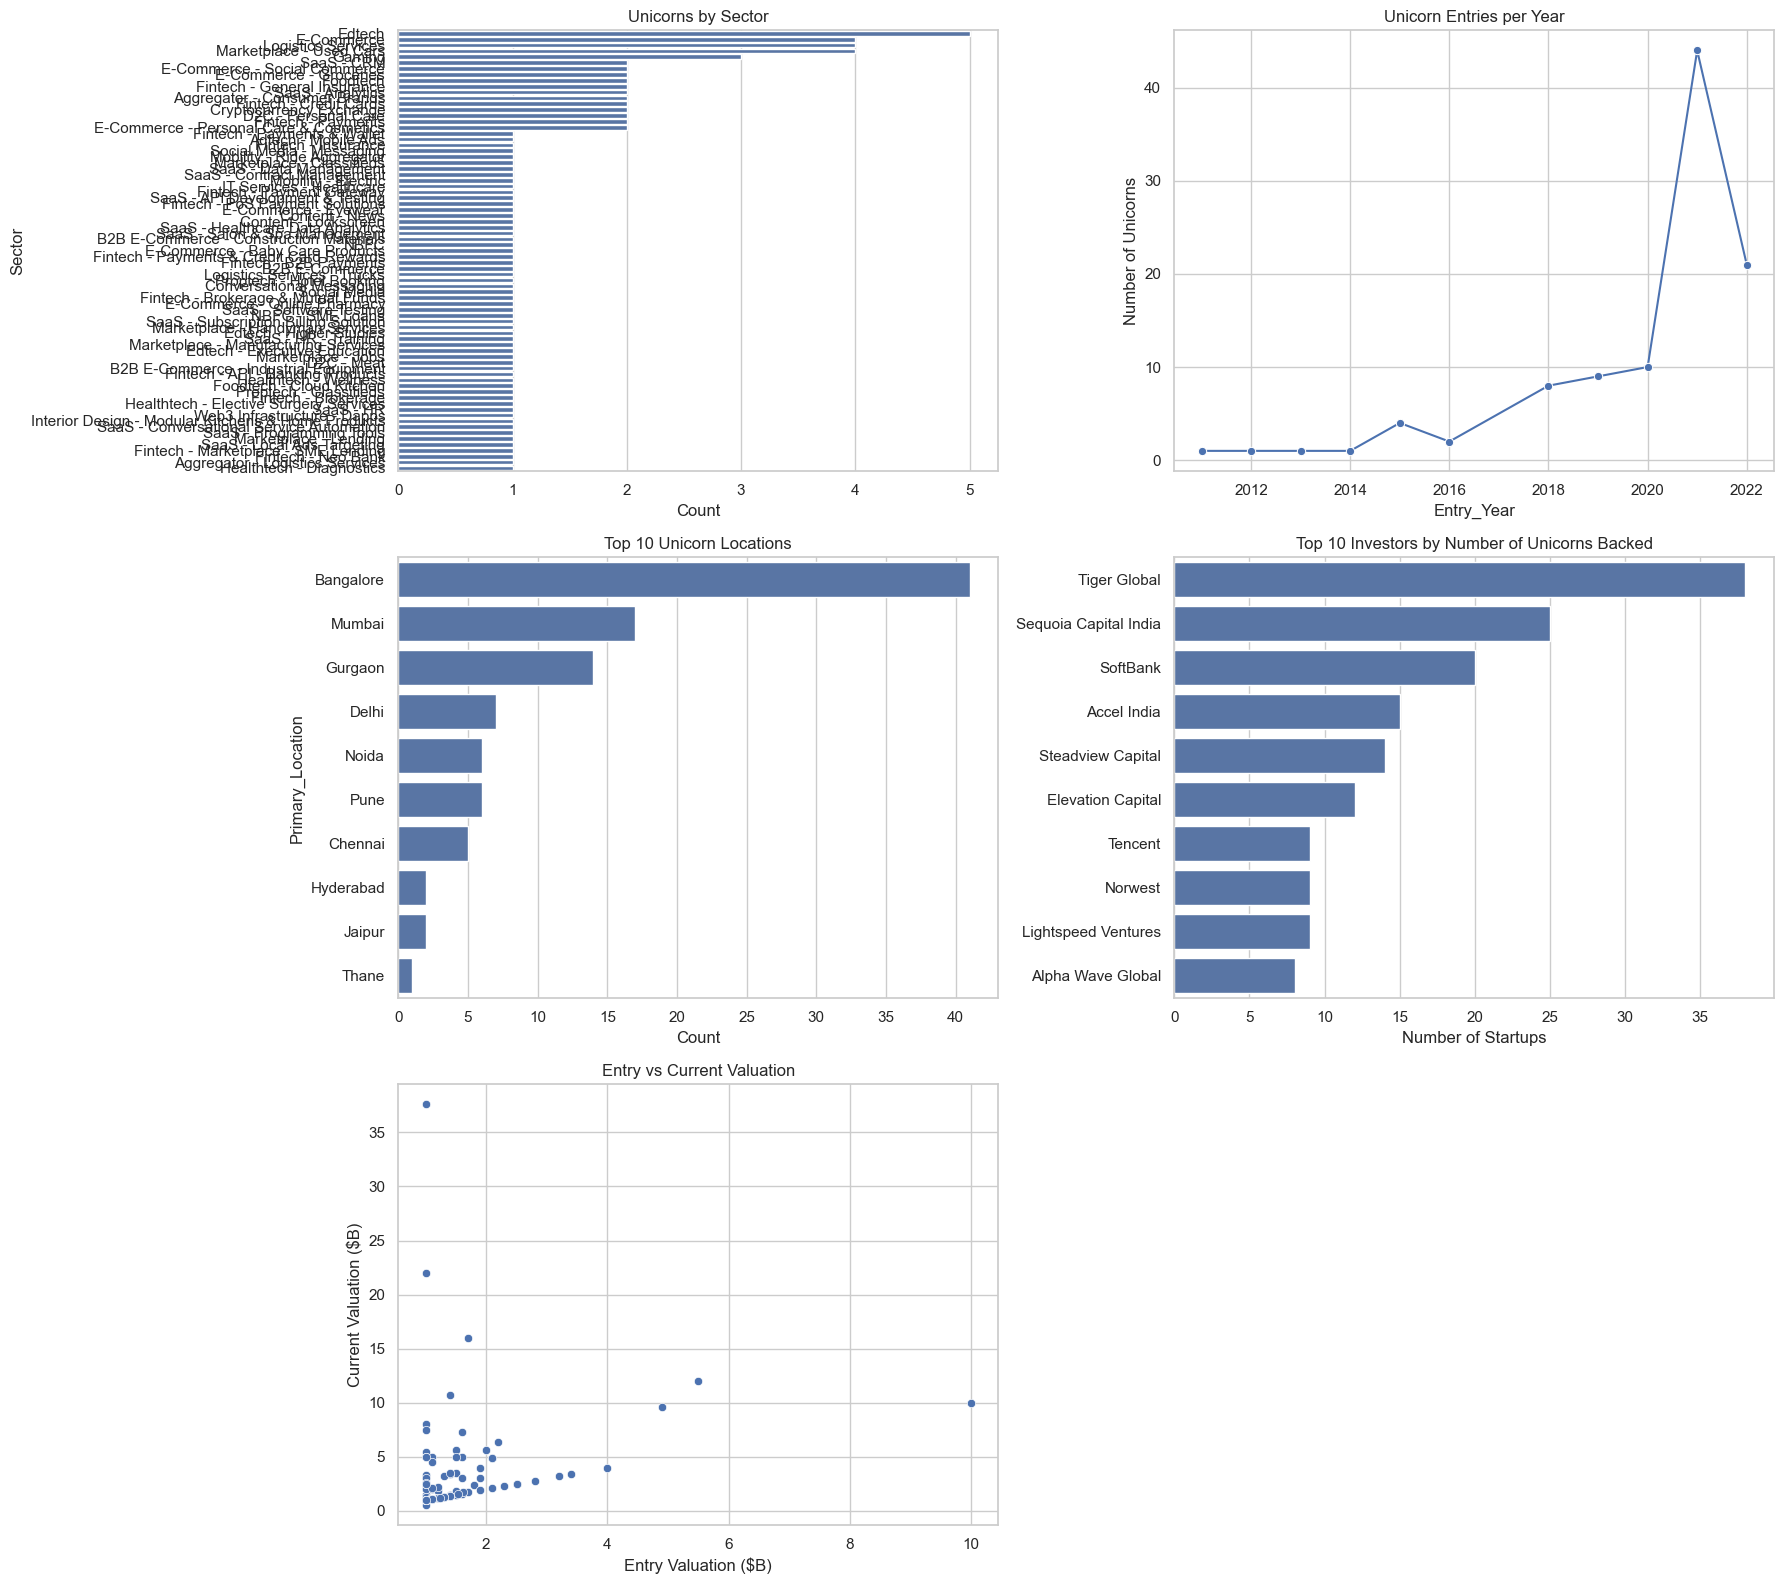

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Sector distribution
sector_counts = df['Sector'].value_counts()

# Entry year distribution
entry_year_counts = df['Entry_Year'].value_counts().sort_index()

# Location distribution
location_counts = df['Primary_Location'].value_counts().head(10)

# Top investors
from collections import Counter
all_investors = [investor for sublist in df['Investor_List'] for investor in sublist]
top_investors = dict(Counter(all_investors).most_common(10))

# Entry vs Current Valuation correlation
valuation_df = df[['Entry Valuation^^ ($B)', 'Valuation ($B)']].dropna()
valuation_df.columns = ['Entry_Valuation', 'Current_Valuation']
valuation_df = valuation_df[valuation_df['Entry_Valuation'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
valuation_df['Entry_Valuation'] = valuation_df['Entry_Valuation'].astype(float)
valuation_df['Current_Valuation'] = valuation_df['Current_Valuation'].astype(float)

# Create plots
fig, axs = plt.subplots(3, 2, figsize=(18, 16))

# Sector Distribution
sns.barplot(x=sector_counts.values, y=sector_counts.index, ax=axs[0, 0])
axs[0, 0].set_title("Unicorns by Sector")
axs[0, 0].set_xlabel("Count")

# Year-wise Entry
sns.lineplot(x=entry_year_counts.index, y=entry_year_counts.values, marker='o', ax=axs[0, 1])
axs[0, 1].set_title("Unicorn Entries per Year")
axs[0, 1].set_ylabel("Number of Unicorns")

# Location Distribution
sns.barplot(x=location_counts.values, y=location_counts.index, ax=axs[1, 0])
axs[1, 0].set_title("Top 10 Unicorn Locations")
axs[1, 0].set_xlabel("Count")

# Top Investors
sns.barplot(x=list(top_investors.values()), y=list(top_investors.keys()), ax=axs[1, 1])
axs[1, 1].set_title("Top 10 Investors by Number of Unicorns Backed")
axs[1, 1].set_xlabel("Number of Startups")

# Entry vs Current Valuation
sns.scatterplot(data=valuation_df, x="Entry_Valuation", y="Current_Valuation", ax=axs[2, 0])
axs[2, 0].set_title("Entry vs Current Valuation")
axs[2, 0].set_xlabel("Entry Valuation ($B)")
axs[2, 0].set_ylabel("Current Valuation ($B)")

# Hide the last unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()
